# Data Visualization

In [ ]:
#importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import ast
import librosa
import plotly.express as px
import plotly.graph_objs as go
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import Audio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import shutil

Mounted at /content/drive


In [ ]:
#Only run once
# source_folder = '/content/drive/MyDrive/data'
# destination_folder = '/content/drive/MyDrive/converted_data'

# shutil.copytree(source_folder, destination_folder)

Now the data is ready in our colab environment

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
trainmeta_df = pd.read_csv("/content/drive/MyDrive/train_metadata.csv")
trainmeta_df.head()

primary_label secondary_labels              type  latitude  longitude  \
0       abethr1               []          ['song']    4.3906    38.2788   
1       abethr1               []          ['call']   -2.9524    38.2921   
2       abethr1               []          ['song']   -2.9524    38.2921   
3       abethr1               []          ['song']   -2.9524    38.2921   
4       abethr1               []  ['call', 'song']   -2.9524    38.2921   

      scientific_name               common_name         author  \
0  Turdus tephronotus  African Bare-eyed Thrush  Rolf A. de By   
1  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
2  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
3  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   
4  Turdus tephronotus  African Bare-eyed Thrush  James Bradley   

                                             license  rating  \
0  Creative Commons Attribution-NonCommercial-Sha...     4.0   
1  Creative Commons Attribution-NonCommercial-Sha...     3.5   
2  Creative Commons Attribution-NonCommercial-Sha...     3.5   
3  Creative Commons Attribution-NonCommercial-Sha...     5.0   
4  Creative Commons Attribution-NonCommercial-Sha...     4.5   

                                 url              filename  
0  https://www.xeno-canto.org/128013  abethr1/XC128013.ogg  
1  https://www.xeno-canto.org/363501  abethr1/XC363501.ogg  
2  https://www.xeno-canto.org/363502  abethr1/XC363502.ogg  
3  https://www.xeno-canto.org/363503  abethr1/XC363503.ogg  
4  https://www.xeno-canto.org/363504  abethr1/XC363504.ogg

In [ ]:
x = trainmeta_df[trainmeta_df["primary_label"] == "afgfly1"]
x

primary_label                   secondary_labels  \
356       afgfly1                                 []   
357       afgfly1                                 []   
358       afgfly1                                 []   
359       afgfly1                                 []   
360       afgfly1  ['combul2', 'kerspa2', 'ratcis1']   
361       afgfly1                                 []   
362       afgfly1                                 []   
363       afgfly1                                 []   

                                      type  latitude  longitude  \
356                               ['song']   -7.5253    34.8521   
357                               ['call']    8.9200    40.0430   
358                               ['call']    8.9200    40.0430   
359                               ['call']   -1.5765    36.6316   
360         ['call,begging call,juvenile']   -2.8145    37.4113   
361     ['adult', 'call', 'sex uncertain']   -3.1481    36.6951   
362  ['call', 'juvenile', 'sex uncertain']   -3.1481    36.6951   
363     ['adult', 'call', 'sex uncertain']   -3.1481    36.6951   

             scientific_name              common_name            author  \
356  Bradornis microrhynchus  African Gray Flycatcher  Martin St-Michel   
357  Bradornis microrhynchus  African Gray Flycatcher    Andrew Spencer   
358  Bradornis microrhynchus  African Gray Flycatcher    Andrew Spencer   
359  Bradornis microrhynchus  African Gray Flycatcher     James Bradley   
360  Bradornis microrhynchus  African Gray Flycatcher        Rory Nefdt   
361  Bradornis microrhynchus  African Gray Flycatcher      isaac kilusu   
362  Bradornis microrhynchus  African Gray Flycatcher      isaac kilusu   
363  Bradornis microrhynchus  African Gray Flycatcher      isaac kilusu   

                                               license  rating  \
356  Creative Commons Attribution-NonCommercial-Sha...     3.0   
357  Creative Commons Attribution-NonCommercial-Sha...     5.0   
358  Creative Commons Attribution-NonCommercial-Sha...     5.0   
359  Creative Commons Attribution-NonCommercial-Sha...     5.0   
360  Creative Commons Attribution-NonCommercial-Sha...     3.5   
361  Creative Commons Attribution-NonCommercial-Sha...     4.0   
362  Creative Commons Attribution-NonCommercial-Sha...     5.0   
363  Creative Commons Attribution-NonCommercial-Sha...     5.0   

                                   url              filename  
356  https://www.xeno-canto.org/134487  afgfly1/XC134487.ogg  
357  https://www.xeno-canto.org/267773  afgfly1/XC267773.ogg  
358  https://www.xeno-canto.org/267774  afgfly1/XC267774.ogg  
359  https://www.xeno-canto.org/344741  afgfly1/XC344741.ogg  
360  https://www.xeno-canto.org/397762  afgfly1/XC397762.ogg  
361  https://www.xeno-canto.org/609474  afgfly1/XC609474.ogg  
362  https://www.xeno-canto.org/609492  afgfly1/XC609492.ogg  
363  https://www.xeno-canto.org/609493  afgfly1/XC609493.ogg

In [ ]:
trainmeta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16941 entries, 0 to 16940
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     16941 non-null  object 
 1   secondary_labels  16941 non-null  object 
 2   type              16941 non-null  object 
 3   latitude          16714 non-null  float64
 4   longitude         16714 non-null  float64
 5   scientific_name   16941 non-null  object 
 6   common_name       16941 non-null  object 
 7   author            16941 non-null  object 
 8   license           16941 non-null  object 
 9   rating            16941 non-null  float64
 10  url               16941 non-null  object 
 11  filename          16941 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.6+ MB


In [ ]:
fig = px.histogram(trainmeta_df, x="primary_label", nbins=len(trainmeta_df["primary_label"].unique()))
fig.update_layout(title_text="Distribution of Primary Labels")
fig.show()

In [ ]:
secondary_df = trainmeta_df['secondary_labels'].str.replace('[','').str.replace(']','').str.replace('\'','').str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('secondary_label')
secondary_df = pd.merge(trainmeta_df.drop(columns=['secondary_labels']), secondary_df, left_index=True, right_index=True)

fig = px.histogram(secondary_df, x="secondary_label", title="Distribution of Secondary Labels")
fig.update_layout(xaxis_title="Secondary Label", yaxis_title="Count")
fig.show()

In [ ]:
# Flatten the list of labels in the "type" column
labels = [label.strip("[]'") for sublist in trainmeta_df['type'].apply(ast.literal_eval) for label in sublist]

# Count the occurrence of each label
label_counts = Counter(labels)

# Create a bar plot of the label counts
fig = px.bar(x=list(label_counts.keys()), y=list(label_counts.values()))
fig.update_layout(title_text="Distribution of Types")
fig.show()

In [ ]:
fig1 = px.box(trainmeta_df, y="latitude")
fig1.update_layout(title_text="Distribution of Latitude",
                   yaxis=dict(title="Latitude"))

# create a box plot for longitude
fig2 = px.box(trainmeta_df, y="longitude")
fig2.update_layout(title_text="Distribution of Longitude",
                   yaxis=dict(title="Longitude"))

# create a box plot for rating
fig3 = px.box(trainmeta_df, y="rating")
fig3.update_layout(title_text="Distribution of Ratings",
                   yaxis=dict(title="Rating"))

# show the figures
fig1.show()
fig2.show()
fig3.show()

In [ ]:
fig = px.histogram(trainmeta_df, x="scientific_name", nbins=len(trainmeta_df["scientific_name"].unique()))
fig.update_layout(title_text="Distribution of Scientific Names")
fig.show()

In [ ]:
fig = px.histogram(trainmeta_df, x="common_name", nbins=len(trainmeta_df["common_name"].unique()))
fig.update_layout(title_text="Distribution of Common Names")
fig.show()

In [ ]:
fig = px.histogram(trainmeta_df, x="author", nbins=len(trainmeta_df["author"].unique()))
fig.update_layout(title_text="Distribution of Authors")
fig.show()

In [ ]:
fig = px.histogram(trainmeta_df, x="rating", nbins=len(trainmeta_df["rating"].unique()) , color_discrete_sequence=['red'])
fig.update_layout(title_text="Distribution of Ratings")
fig.show()

In [ ]:
# drop columns from correlation matrix
corr = trainmeta_df.corr()

# create correlation heatmap
fig = px.imshow(corr,
                labels=dict(x="Columns", y="Columns", color="Correlation"),
                x=corr.columns,
                y=corr.columns,
                color_continuous_scale='RdBU',
                zmin=-1,
                zmax=1,
                title="Correlation Heatmap")

# add text annotations
annotations = []
for i, row in enumerate(corr.values):
    for j, value in enumerate(row):
        text = '{:.2f}'.format(value)
        annotations.append(dict(x=corr.columns[j], y=corr.columns[i], text=text, showarrow=False))

fig.update_layout(width=800, height=800)
fig.update_traces(showscale=True, colorbar_thickness=25, colorbar_len=0.75)
fig.update_layout(margin=dict(l=50, r=50, b=100, t=100, pad=4))
fig.update_layout(annotations=annotations)
fig.show()

In [ ]:
fig = px.scatter(trainmeta_df, x="longitude", y="latitude", color="common_name")
fig.update_layout(title="Distribution of Recordings by Location")
fig.show()

In [ ]:
fig = px.scatter_mapbox(trainmeta_df, lat="latitude", lon="longitude", color="common_name",
                        hover_name="filename", hover_data=["common_name", "author", "rating"],
                        zoom=3, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
fig = px.density_mapbox(trainmeta_df, lat='latitude', lon='longitude', radius=10,
                        center=dict(lat=47.6, lon=-122.3), zoom=1.5,
                        mapbox_style="stamen-terrain")
fig.update_layout(title_text="Distribution of Bird Sightings")
fig.show()

**EBird Taxonomy**

In [ ]:
train_species_df = pd.read_csv("/content/drive/MyDrive/eBird_Taxonomy_v2021.csv")
train_species_df.head()

TAXON_ORDER CATEGORY SPECIES_CODE       PRIMARY_COM_NAME  \
0            1  species      ostric2         Common Ostrich   
1            6  species      ostric3         Somali Ostrich   
2            7    slash       y00934  Common/Somali Ostrich   
3            8  species      grerhe1           Greater Rhea   
4           14  species      lesrhe2            Lesser Rhea   

                         SCI_NAME            ORDER1  \
0                Struthio camelus  Struthioniformes   
1          Struthio molybdophanes  Struthioniformes   
2  Struthio camelus/molybdophanes  Struthioniformes   
3                  Rhea americana        Rheiformes   
4                    Rhea pennata        Rheiformes   

                      FAMILY SPECIES_GROUP REPORT_AS  
0  Struthionidae (Ostriches)     Ostriches       NaN  
1  Struthionidae (Ostriches)           NaN       NaN  
2  Struthionidae (Ostriches)           NaN       NaN  
3            Rheidae (Rheas)         Rheas       NaN  
4            Rheidae (Rheas)           NaN       NaN

In [ ]:
# Histogram of the taxonomic order counts
fig1 = px.histogram(train_species_df, x="TAXON_ORDER", color_discrete_sequence=['aquamarine'])
fig1.update_layout(title_text="Distribution of Taxonomic Orders")

# Bar plot of the species group counts
# Box plot of the taxonomic order counts by category
fig3 = px.box(train_species_df, x="CATEGORY", y="TAXON_ORDER", color_discrete_sequence=['red'])
fig3.update_layout(title_text="Taxonomic Order Distribution by Category")

# Scatter plot of the taxonomic order counts by family
fig4 = px.scatter(train_species_df, x="FAMILY", y="TAXON_ORDER")
fig4.update_layout(title_text="Taxonomic Order Distribution by Family")

# Show the plots
fig1.show()
fig3.show()
fig4.show()

# Audio Exploration

**Function to perform all the analysis on a single bird species**

In [ ]:
def audio_eda(audio_path):

    # Load an audio file
    samples, sample_rate = librosa.load(audio_path)

    # Visualize the waveform
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(samples, sr=sample_rate)
    plt.title('Waveform')

    # Compute the spectrogram
    spectrogram = librosa.stft(samples)
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

    # Visualize the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (dB)')

    # Compute the mel spectrogram


    # Visualize the mel spectrogram
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)

    # Visualize mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()


    # Compute the chromagram
    chromagram = librosa.feature.chroma_stft( y = samples , sr = sample_rate)

    # Visualize the chromagram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chromagram')

    # Compute the MFCCs
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=13)

    # Visualize the MFCCs
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')

    # Show the plots
    display(Audio(samples, rate=sample_rate))
    plt.show()

**Primary Label : abethr1**

**Scientific Name : Turdus tephronotus**

**Common Name: African Bare-eyed Thrush**

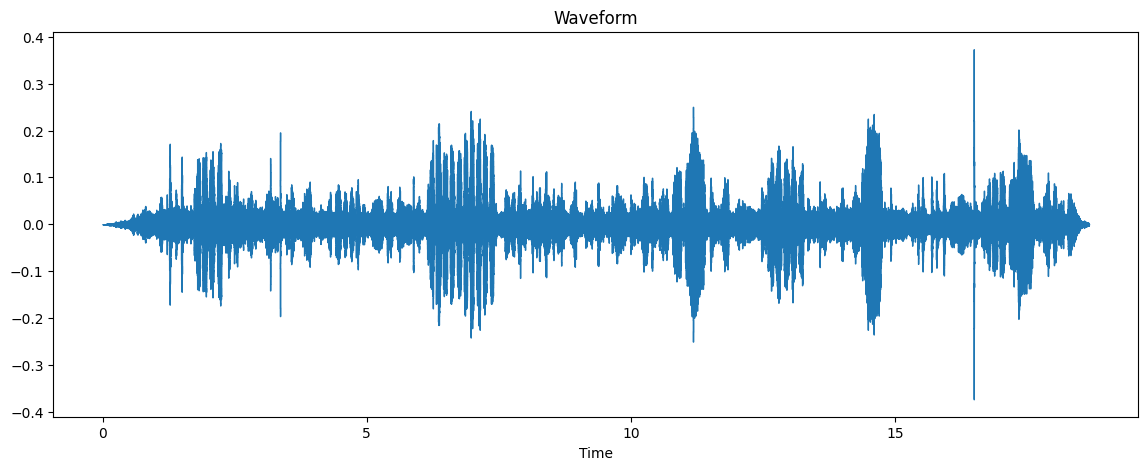

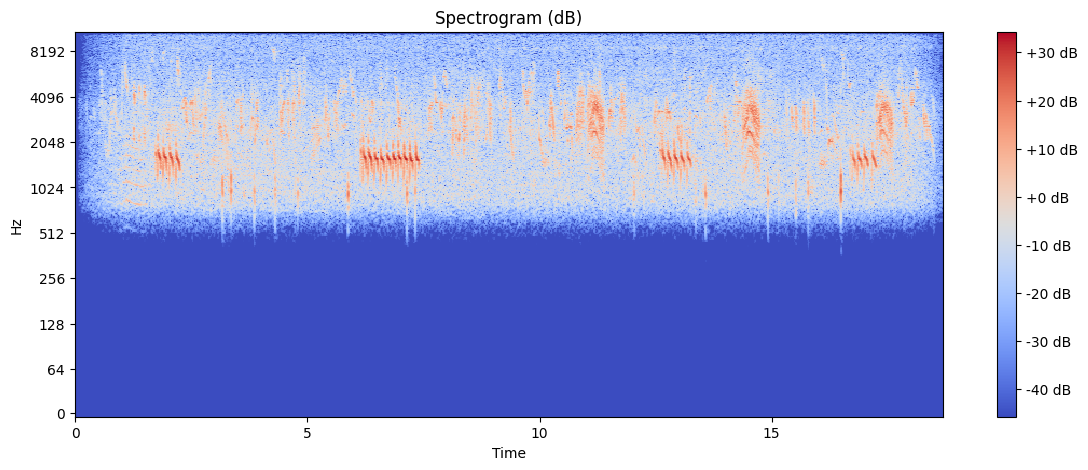

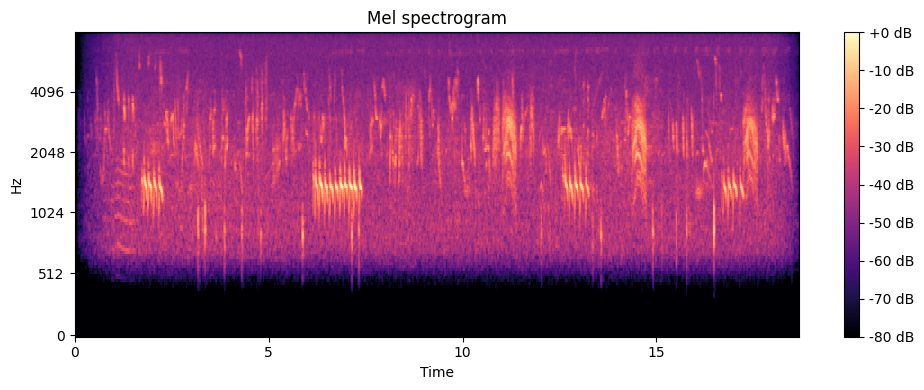

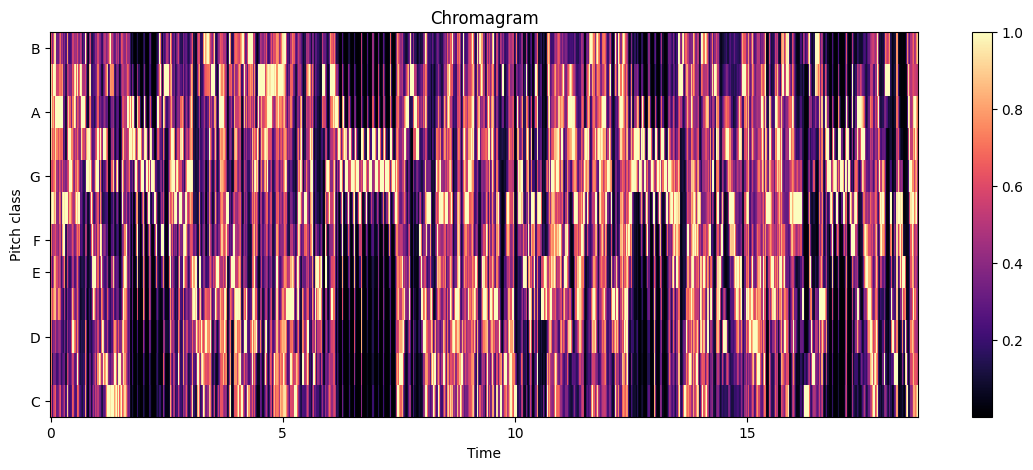

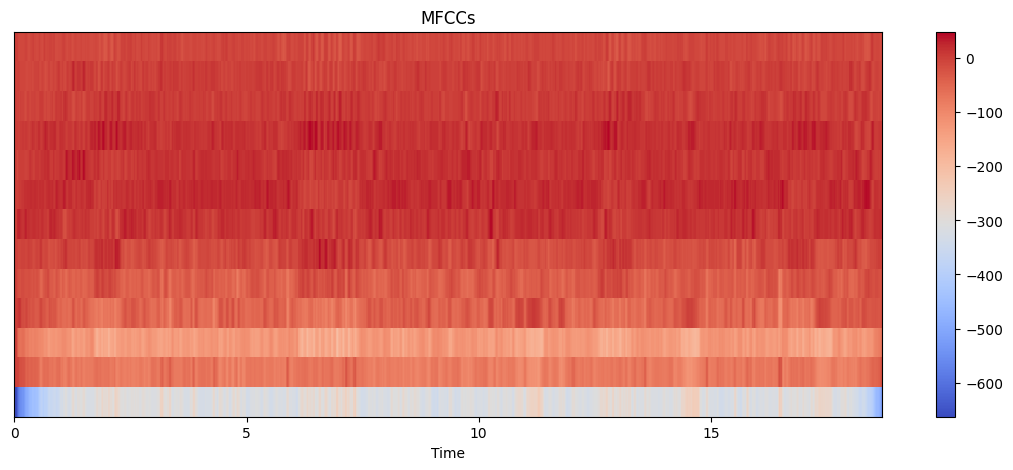

In [ ]:
audio_eda('/content/drive/MyDrive/data/train/abethr1/XC363501.ogg')